## Softmax

In [1]:
import numpy as np

In [2]:
vector = np.array([11231, 999, 123142])

In [3]:
vector = np.array([-10, 10, 24])

In [4]:
def softmax(vec):
    vec -= np.max(vec)
    exp = np.exp(vec)
    return exp / np.sum(exp)

In [5]:
softmax(vector)

array([1.71390701e-15, 8.31528028e-07, 9.99999168e-01])

In [6]:
np.exp?

In [11]:
np.sum([1,2])

3

## Assignment-04 基于维基百科的词向量构建

在本章，你将使用Gensim和维基百科获得你的第一批词向量，并且感受词向量的基本过程。

![](https://www.kaggleusercontent.com/kf/1018109/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..JNNggcCCDcYEypvp7ZDwOA.cM9CuDpuCKo0K_ZkMFLAUvhfip0P6SRZ4LddwgTtgwz8pQy1dZeGVJWi6u81KSpAFNSi7YximVVJbPw8xsFySdWlqoUwvSER-LLIRfmlpsCvtDt90NaLYT2FHlwl0tfF-1MKtiFsWlGQ8LGo40hL3ccBSwMZy214kGJf9bNkW_g.kZbF5sgN5qha3zhjilfSDg/__results___files/__results___9_0.png)

## Step-01: Download Wikipedia Chinese Corpus: https://dumps.wikimedia.org/zhwiki/20190720/

第一步：使用维基百科下载中文语料库

## Step-02: Using https://github.com/attardi/wikiextractor to extract the wikipedia corpus

第二步：使用python wikipedia extractor抽取维基百科的内容

## Step-03: Using gensim get word vectors: 

Reference: 

+ https://radimrehurek.com/gensim/models/word2vec.html
+ https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第三步：参考Gensim的文档和Kaggle的参考文档，获得词向量。 注意，你要使用Jieba分词把维基百科的内容切分成一个一个单词，然后存进新的文件中。然后，你需要用Gensim的LineSentence这个类进行文件的读取。

在训练成词向量Model.

## Step-04: Using some words to test your preformance. 

第四步，测试同义词，找几个单词。

## Step-05: Using visualization tools: https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第五步：使用Kaggle给出的T-SEN进行词向量的可视化。

In [ ]:
#使用WikiExtractor从原始xml文件中解析文本数据

In [56]:
ls wikiextractor-master

README.md*         categories.filter* extract.sh*
WikiExtractor.py*  cirrus-extract.py* texthylan/


In [ ]:
python WikiExtractor.py -o testhylan /Users/hylan/github/2019-summer/assignments/zhwiki-20190720-pages-articles-multistream.xml

In [72]:
import jieba,os

path_root = "/Users/hylan/github/2019-summer/assignments/wikiextractor-master/texthylan"
path_details = {}  #文本文件存储目录字典
for i in (list(os.walk(path_root))):
    path_details[i[0]]=i[2]

In [73]:
path_details

{'/Users/hylan/github/2019-summer/assignments/wikiextractor-master/texthylan': ['.DS_Store'],
 '/Users/hylan/github/2019-summer/assignments/wikiextractor-master/texthylan/AC': ['wiki_73',
  'wiki_87',
  'wiki_80',
  'wiki_74',
  'wiki_89',
  'wiki_42',
  'wiki_45',
  'wiki_11',
  'wiki_16',
  'wiki_29',
  'wiki_20',
  'wiki_27',
  'wiki_18',
  'wiki_44',
  'wiki_88',
  'wiki_43',
  'wiki_75',
  'wiki_81',
  'wiki_86',
  'wiki_72',
  'wiki_26',
  'wiki_19',
  'wiki_21',
  'wiki_17',
  'wiki_28',
  'wiki_10',
  'wiki_32',
  'wiki_35',
  'wiki_03',
  'wiki_04',
  'wiki_50',
  'wiki_57',
  'wiki_68',
  'wiki_61',
  'wiki_95',
  'wiki_92',
  'wiki_66',
  'wiki_59',
  'wiki_05',
  'wiki_02',
  'wiki_34',
  'wiki_33',
  'wiki_67',
  'wiki_93',
  'wiki_58',
  'wiki_94',
  'wiki_60',
  'wiki_56',
  'wiki_69',
  'wiki_51',
  'wiki_15',
  'wiki_12',
  'wiki_24',
  'wiki_23',
  'wiki_48',
  'wiki_83',
  'wiki_77',
  'wiki_70',
  'wiki_84',
  'wiki_79',
  'wiki_46',
  'wiki_41',
  'wiki_22',
  'wik

In [74]:
del path_details['/Users/hylan/github/2019-summer/assignments/wikiextractor-master/texthylan']

In [75]:
path_details

{'/Users/hylan/github/2019-summer/assignments/wikiextractor-master/texthylan/AC': ['wiki_73',
  'wiki_87',
  'wiki_80',
  'wiki_74',
  'wiki_89',
  'wiki_42',
  'wiki_45',
  'wiki_11',
  'wiki_16',
  'wiki_29',
  'wiki_20',
  'wiki_27',
  'wiki_18',
  'wiki_44',
  'wiki_88',
  'wiki_43',
  'wiki_75',
  'wiki_81',
  'wiki_86',
  'wiki_72',
  'wiki_26',
  'wiki_19',
  'wiki_21',
  'wiki_17',
  'wiki_28',
  'wiki_10',
  'wiki_32',
  'wiki_35',
  'wiki_03',
  'wiki_04',
  'wiki_50',
  'wiki_57',
  'wiki_68',
  'wiki_61',
  'wiki_95',
  'wiki_92',
  'wiki_66',
  'wiki_59',
  'wiki_05',
  'wiki_02',
  'wiki_34',
  'wiki_33',
  'wiki_67',
  'wiki_93',
  'wiki_58',
  'wiki_94',
  'wiki_60',
  'wiki_56',
  'wiki_69',
  'wiki_51',
  'wiki_15',
  'wiki_12',
  'wiki_24',
  'wiki_23',
  'wiki_48',
  'wiki_83',
  'wiki_77',
  'wiki_70',
  'wiki_84',
  'wiki_79',
  'wiki_46',
  'wiki_41',
  'wiki_22',
  'wiki_25',
  'wiki_13',
  'wiki_14',
  'wiki_40',
  'wiki_78',
  'wiki_47',
  'wiki_85',
  'wiki_7

In [78]:
# 合并文件，并保存在wiki_content.txt！
i=0 
for path_root_need in path_details.keys():
   
    for path_root_filename in path_details[path_root_need]:
        
        new_path = path_root_need + '/' + path_root_filename
        
        f0 = [re.findall('[\d|\w]+',i) for i in open(new_path).readlines()]
        
        f1 = [' '.join(j) for j in f0]
        
        f2 = [' '.join(jieba.cut(n)) for n in f1]
        
        with open('wiki_content.txt', 'a') as f:
            for n in f2:
                f.write(n + '\n')
        i += 1
        print(i)
    print("finished！-->" + path_root_need)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
finished！-->/Users/hylan/github/2019-summer/assignments/wikiextractor-master/texthylan/AC
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
finished！-->/Users/hylan/github/2019-summer/assignments/wikiextractor-master/texthylan/AD
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232


词向量可视化

In [47]:
from gensim.models import Word2Vec

In [48]:
word_begin = Word2Vec.load("wordvec/hylan_word.model")

In [49]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

#定义可视化函数，参数：model，核心词，topn数
def tsne_plot(model,display_word,number):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    #for word in model.wv.vocab
    for word in model.most_similar(display_word,topn = number):
        tokens.append(model[word[0]])
        labels.append(word[0])
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.savefig('hylan.png')
    plt.show()

/Users/hylan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':
/Users/hylan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/Users/hylan/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hylan/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


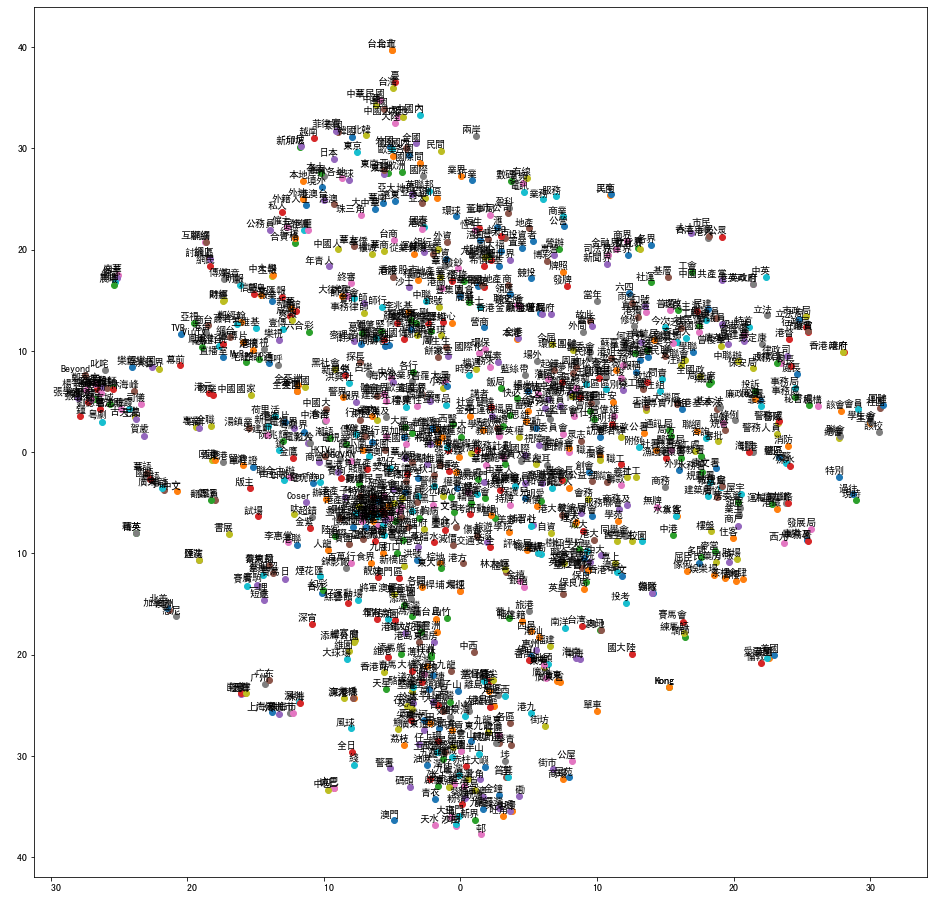

In [31]:
tsne_plot(word_begin,'香港',1000)

/Users/hylan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':
/Users/hylan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/Users/hylan/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hylan/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


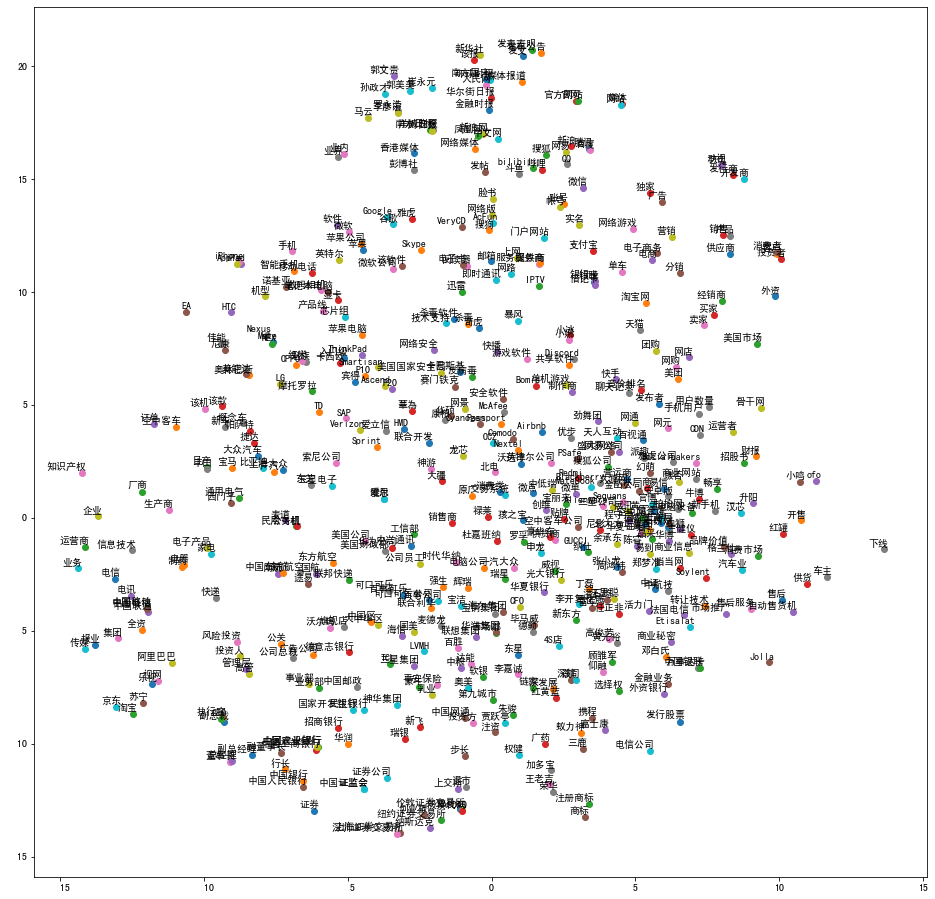

In [33]:
tsne_plot(word_begin,'华为',500)

In [37]:
word_begin.most_similar('华为', topn=20),word_begin.most_similar('航天', topn=20)

/Users/hylan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


([('中兴通讯', 0.8025444746017456),
  ('苹果公司', 0.7972045540809631),
  ('中国移动', 0.7971173524856567),
  ('华为公司', 0.7963854670524597),
  ('中国联通', 0.7724207639694214),
  ('中国电信', 0.7644343972206116),
  ('手机', 0.7571322321891785),
  ('魅族', 0.7416635751724243),
  ('网易', 0.7391951680183411),
  ('三星电子', 0.7379695773124695),
  ('杀毒软件', 0.7321930527687073),
  ('智能手机', 0.7297343015670776),
  ('第九城市', 0.7273766994476318),
  ('尼彩', 0.7271806001663208),
  ('国航', 0.7259811162948608),
  ('华硕', 0.7234746813774109),
  ('微软', 0.7180768251419067),
  ('加多宝', 0.716465413570404),
  ('余承东', 0.7103499174118042),
  ('谷歌', 0.707859992980957)],
 [('载人', 0.7451748847961426),
  ('测控', 0.7351624965667725),
  ('中国航天', 0.7286200523376465),
  ('航空航天', 0.719146728515625),
  ('宇航', 0.7118079662322998),
  ('探月', 0.709716796875),
  ('載人', 0.7071487307548523),
  ('航天技术', 0.7012906074523926),
  ('航太', 0.6893119812011719),
  ('神舟', 0.6763491630554199),
  ('人造卫星', 0.6762285828590393),
  ('美国国家航空航天局', 0.674498975276947),
  ('航天局', 

In [35]:
len(word_begin.wv.vocab),word_begin.wv.vocab

(967376,
 {'doc': <gensim.models.keyedvectors.Vocab at 0x1a21fe1d68>,
  'id': <gensim.models.keyedvectors.Vocab at 0x1a21fe1e48>,
  'url': <gensim.models.keyedvectors.Vocab at 0x1a21fe1eb8>,
  'https': <gensim.models.keyedvectors.Vocab at 0x1a21fe1f28>,
  'zh': <gensim.models.keyedvectors.Vocab at 0x1a21fe1f98>,
  'wikipedia': <gensim.models.keyedvectors.Vocab at 0x1a21fe1fd0>,
  'org': <gensim.models.keyedvectors.Vocab at 0x1a21fef080>,
  'wiki': <gensim.models.keyedvectors.Vocab at 0x1a21fef0f0>,
  'curid': <gensim.models.keyedvectors.Vocab at 0x1a21fef160>,
  'title': <gensim.models.keyedvectors.Vocab at 0x1a21fef1d0>,
  '狄娜': <gensim.models.keyedvectors.Vocab at 0x1a21fef208>,
  '原名': <gensim.models.keyedvectors.Vocab at 0x1a21fef240>,
  '生': <gensim.models.keyedvectors.Vocab at 0x1a21fef278>,
  '於': <gensim.models.keyedvectors.Vocab at 0x1a21fef2b0>,
  '廣東': <gensim.models.keyedvectors.Vocab at 0x1a21fef2e8>,
  '興寧': <gensim.models.keyedvectors.Vocab at 0x1a21fef320>,
  '籍': <gens

In [36]:
word_begin['香港'],word_begin['城市']

/Users/hylan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(array([ 2.458323  , -2.7848265 ,  0.97077614, -2.3945668 , -0.5161389 ,
         0.56242585,  1.7619218 ,  1.6356485 ,  0.555478  , -0.27064627,
        -6.176592  ,  1.0004064 ,  3.2617183 , -3.7550929 ,  1.1029445 ,
        -1.4488685 , -6.638795  ,  0.17667821, -0.38578597, -1.7943863 ,
         0.53291047, -1.5804638 ,  0.44792926, -3.3326132 , -2.3549373 ,
         0.06718692, -6.256553  , -0.66091216, -1.6816567 ,  3.4807909 ,
        -2.643672  ,  4.1867046 , -2.779339  , -2.2998252 ,  2.6171231 ,
         0.25485653, -3.3173347 ,  2.811904  , -2.2741575 , -0.3347331 ,
        -5.3380346 ,  1.3035288 ,  0.83702254,  0.3627269 , -1.7326337 ,
        -0.34336054, -2.011709  , -4.45273   ,  1.7141038 , -0.3283156 ,
         0.81074667,  3.208565  ,  0.643808  ,  1.4351968 ,  0.3369564 ,
        -2.8597627 ,  1.4949809 , -0.649997  ,  0.49196678,  1.8327171 ,
        -0.904243  , -4.399942  ,  1.6930178 , -0.21366765, -3.9075577 ,
         0.74788576, -4.2729053 ,  0.17922415,  3.4

In [43]:
word_begin.most_similar('黄金',topn=20),word_begin.most_similar('刚玉',topn=20),

/Users/hylan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


([('金银', 0.7361382246017456),
  ('钻石', 0.7051430344581604),
  ('白银', 0.6924118399620056),
  ('银锭', 0.6807610988616943),
  ('宝石', 0.6766615509986877),
  ('银', 0.6753537058830261),
  ('金钱', 0.6601168513298035),
  ('高价', 0.6531699895858765),
  ('首饰', 0.6526728868484497),
  ('绿宝石', 0.6519151329994202),
  ('贵金属', 0.6485523581504822),
  ('现金', 0.6445391178131104),
  ('金币', 0.6404551267623901),
  ('宝物', 0.6389214992523193),
  ('珍宝', 0.6340509057044983),
  ('铜', 0.6306312680244446),
  ('项链', 0.6275522112846375),
  ('食盐', 0.6272957921028137),
  ('珠宝', 0.6271929144859314),
  ('丝绸', 0.6266800165176392)],
 [('钾长石', 0.8570730090141296),
  ('重晶石', 0.8561142683029175),
  ('绿柱石', 0.8509867787361145),
  ('白云石', 0.8431371450424194),
  ('黄铁矿', 0.8412290811538696),
  ('二氧化钛', 0.8389320373535156),
  ('角闪石', 0.8367319703102112),
  ('蛇纹石', 0.8298965692520142),
  ('萤石', 0.8293156623840332),
  ('褐铁矿', 0.827751636505127),
  ('铝硅酸盐', 0.8277131915092468),
  ('菱铁矿', 0.8264760971069336),
  ('硅石', 0.8260405659675598

In [45]:
word_begin.most_similar('培训',topn=20),word_begin.most_similar('人工智能',topn=20),

/Users/hylan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


([('训练', 0.8350117206573486),
  ('军事训练', 0.8233151435852051),
  ('职业培训', 0.8162694573402405),
  ('培训班', 0.7894269227981567),
  ('军训', 0.7882343530654907),
  ('实习', 0.783862292766571),
  ('志愿', 0.7616316080093384),
  ('技术培训', 0.7576867341995239),
  ('专业培训', 0.7527691125869751),
  ('医疗', 0.748558521270752),
  ('辅导', 0.747984766960144),
  ('短期培训', 0.7478864789009094),
  ('专业知识', 0.7472131252288818),
  ('护理', 0.7458087801933289),
  ('培训中心', 0.738890528678894),
  ('教学', 0.7258739471435547),
  ('基础教育', 0.7251141667366028),
  ('文职人员', 0.722263753414154),
  ('音乐教育', 0.7158478498458862),
  ('培养', 0.7153087258338928)],
 [('AI', 0.8439417481422424),
  ('人工智慧', 0.8391981720924377),
  ('智能', 0.7734254002571106),
  ('虚拟现实', 0.7067815065383911),
  ('计算机', 0.6954160928726196),
  ('机器人', 0.6941739320755005),
  ('软件工程', 0.6764644384384155),
  ('建模', 0.6716197729110718),
  ('编程', 0.6711214780807495),
  ('认知科学', 0.663163423538208),
  ('計算機', 0.6603845953941345),
  ('软件开发', 0.6590666770935059),
  ('神经网络', 

/Users/hylan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # This is added back by InteractiveShellApp.init_path()
/Users/hylan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':
/Users/hylan/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hylan/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


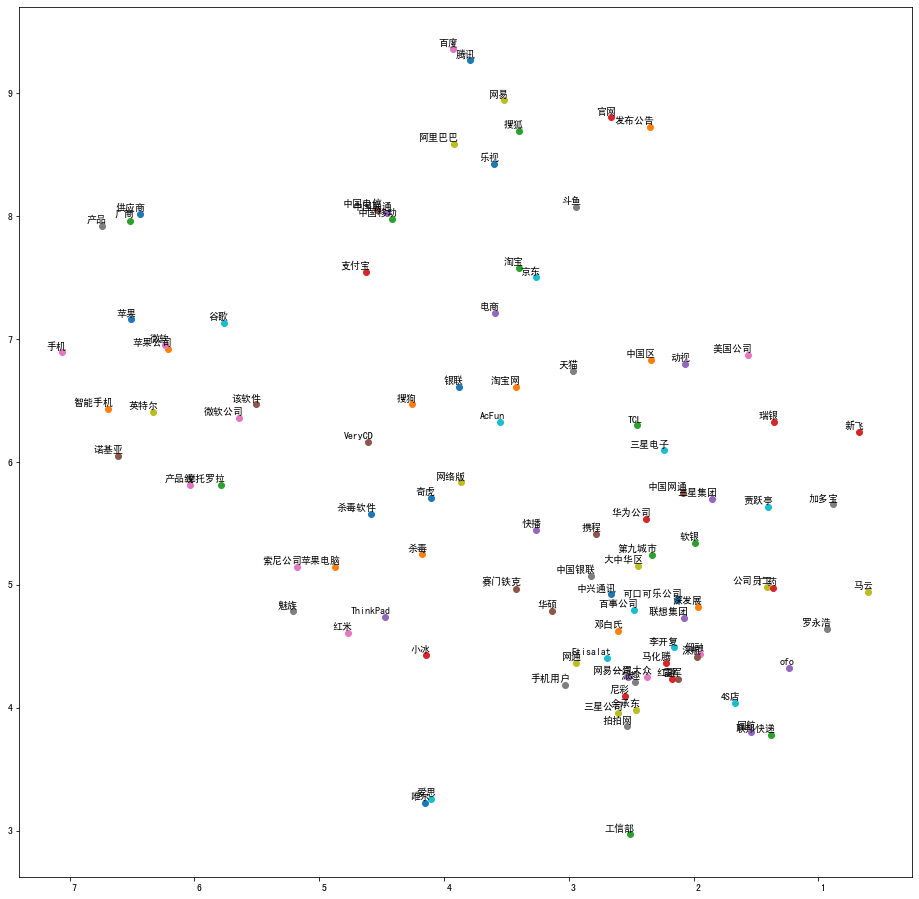

/Users/hylan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # This is added back by InteractiveShellApp.init_path()
/Users/hylan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':
/Users/hylan/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hylan/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


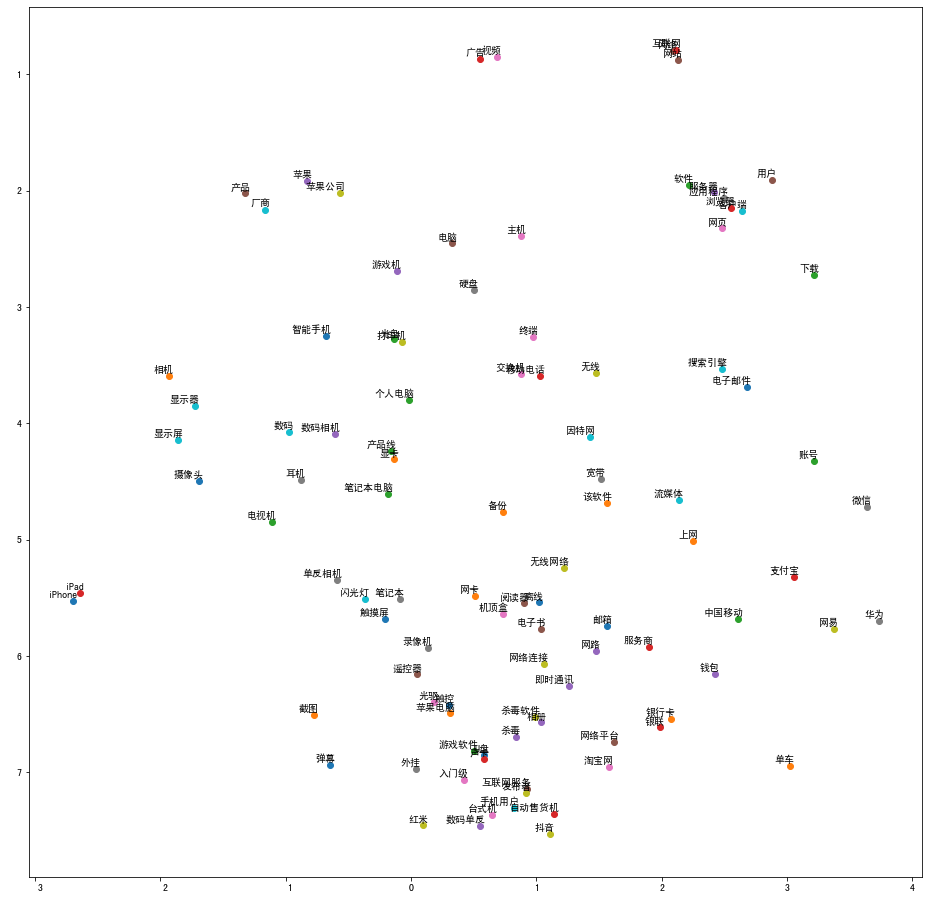

(None, None)

In [53]:
tsne_plot(word_begin,'华为',100),tsne_plot(word_begin,'手机',100)